### Import Libraries

In [1]:
from __future__ import division, print_function, absolute_import

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.optimizers import SGD

import keras.backend as k
import keras.utils

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### EDA

In [3]:
nb_classes = 10
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


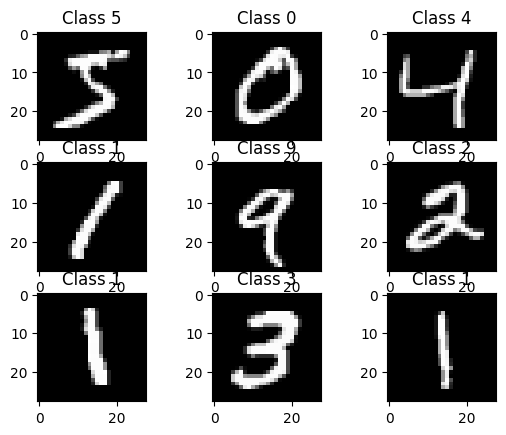

In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none' )
    plt.title("Class {}".format(y_train[i]))
    
plt.show()

In [5]:
# Normalise Data
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

# Convert output class type
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
# Define AlexNet model
def alexnet():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
                     
    model.add(Conv2D(128, (7, 7), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
                     
    model.add(Conv2D(192, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
                     
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
                     
    model.add(Flatten())
    model.add(Dense(4096) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(4096) )
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10) )
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
                     
    return model

In [7]:
#with K.tf.device('/gpu:@'):
model = alexnet()
optim = SGD(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['acc'])

C:\Users\MOHD TALHA HUSSAIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
# TRAIN MODEL-------------------------
#Need to run for 20-30 epochs atleast. Use Early stopping callback for better
#results with very high epochs of 500 or 1000
model.fit(X_train.reshape(60000,28,28,1), Y_train, batch_size=50, epochs=25,
    validation_data=(X_test.reshape(10000,28,28,1),Y_test),verbose=1)

Epoch 1/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 198s 165ms/step - acc: 0.7752 - loss: 1.0277 - val_acc: 0.9329 - val_loss: 0.6025
Epoch 2/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 234s 195ms/step - acc: 0.9111 - loss: 0.6883 - val_acc: 0.9502 - val_loss: 0.5322
Epoch 3/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 204s 170ms/step - acc: 0.9308 - loss: 0.6189 - val_acc: 0.9571 - val_loss: 0.4876
Epoch 4/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 211s 176ms/step - acc: 0.9420 - loss: 0.5783 - val_acc: 0.9637 - val_loss: 0.4605
Epoch 5/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 212s 176ms/step - acc: 0.9486 - loss: 0.5494 - val_acc: 0.9663 - val_loss: 0.4355
Epoch 6/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 200s 167ms/step - acc: 0.9543 - loss: 0.5245 - val_acc: 0.9694 - val_loss: 0.4173
Epoch 7/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 209s 174ms/step - acc: 0.9572 - loss: 0.5053 - val_acc: 0.9717 - val_loss: 0.4008
Epoch 8/25
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 210s 175ms/step - acc: 0.9602 - loss: 0.4888 - val_acc: 0.9733 - val_loss: 0.3896
Epoch 9/

In [13]:
# EVALUATE MODEL --------------------- 
score = model.evaluate(X_test.reshape(10000,28,28,1), Y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - acc: 0.9799 - loss: 0.2769


In [15]:
#Predict individual classes 
predicted_classes = model.predict(X_test.reshape(10000, 28, 28,1)) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [25]:
predicted_labels = np.argmax(predicted_classes, axis=1) 

In [27]:
incorrect_indices = np.where(predicted_labels != y_test)[0] 

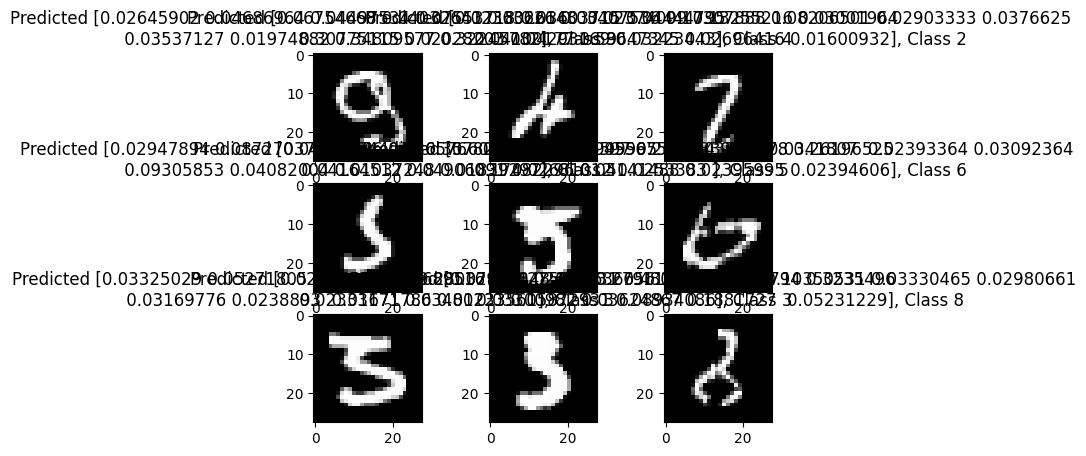

In [30]:
plt.figure() 
for i, incorrect in enumerate(incorrect_indices[:9]): 
    plt.subplot(3,3,i+1) 
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray',
               interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], 
    y_test[incorrect])) 
    
plt.show()

In [31]:
# SAVE MODEL ------------------------- 
model.save("./myAlexnetmodel.keras") 

### Training with a smaller subset of data 

In [32]:
import glob 
import numpy as np 
import os 
import shutil 
np.random.seed(42)

In [52]:
# Load file names 
files = glob.glob( 'dogs-vs-cats//train//train//*' ) 
cat_files = [fn for fn in files if 'cat' in fn]
dog_files = [fn for fn in files if 'dog' in fn] 

In [53]:
dog_files

['dogs-vs-cats//train//train\\cat.0.jpg',
 'dogs-vs-cats//train//train\\cat.1.jpg',
 'dogs-vs-cats//train//train\\cat.10.jpg',
 'dogs-vs-cats//train//train\\cat.100.jpg',
 'dogs-vs-cats//train//train\\cat.1000.jpg',
 'dogs-vs-cats//train//train\\cat.10000.jpg',
 'dogs-vs-cats//train//train\\cat.10001.jpg',
 'dogs-vs-cats//train//train\\cat.10002.jpg',
 'dogs-vs-cats//train//train\\cat.10003.jpg',
 'dogs-vs-cats//train//train\\cat.10004.jpg',
 'dogs-vs-cats//train//train\\cat.10005.jpg',
 'dogs-vs-cats//train//train\\cat.10006.jpg',
 'dogs-vs-cats//train//train\\cat.10007.jpg',
 'dogs-vs-cats//train//train\\cat.10008.jpg',
 'dogs-vs-cats//train//train\\cat.10009.jpg',
 'dogs-vs-cats//train//train\\cat.1001.jpg',
 'dogs-vs-cats//train//train\\cat.10010.jpg',
 'dogs-vs-cats//train//train\\cat.10011.jpg',
 'dogs-vs-cats//train//train\\cat.10012.jpg',
 'dogs-vs-cats//train//train\\cat.10013.jpg',
 'dogs-vs-cats//train//train\\cat.10014.jpg',
 'dogs-vs-cats//train//train\\cat.10015.jpg',
 'd

In [54]:
cat_files 

['dogs-vs-cats//train//train\\cat.0.jpg',
 'dogs-vs-cats//train//train\\cat.1.jpg',
 'dogs-vs-cats//train//train\\cat.10.jpg',
 'dogs-vs-cats//train//train\\cat.100.jpg',
 'dogs-vs-cats//train//train\\cat.1000.jpg',
 'dogs-vs-cats//train//train\\cat.10000.jpg',
 'dogs-vs-cats//train//train\\cat.10001.jpg',
 'dogs-vs-cats//train//train\\cat.10002.jpg',
 'dogs-vs-cats//train//train\\cat.10003.jpg',
 'dogs-vs-cats//train//train\\cat.10004.jpg',
 'dogs-vs-cats//train//train\\cat.10005.jpg',
 'dogs-vs-cats//train//train\\cat.10006.jpg',
 'dogs-vs-cats//train//train\\cat.10007.jpg',
 'dogs-vs-cats//train//train\\cat.10008.jpg',
 'dogs-vs-cats//train//train\\cat.10009.jpg',
 'dogs-vs-cats//train//train\\cat.1001.jpg',
 'dogs-vs-cats//train//train\\cat.10010.jpg',
 'dogs-vs-cats//train//train\\cat.10011.jpg',
 'dogs-vs-cats//train//train\\cat.10012.jpg',
 'dogs-vs-cats//train//train\\cat.10013.jpg',
 'dogs-vs-cats//train//train\\cat.10014.jpg',
 'dogs-vs-cats//train//train\\cat.10015.jpg',
 'd

In [55]:
len(cat_files), len(dog_files) 

(1319, 1319)

### Training set 

In [43]:
len(cat_files)

1319

In [44]:
# choose a random sub-set of 15@@0 images [names] for training set 
cat_train = np.random.choice(cat_files, size=1319, replace=False) 
dog_train = np.random.choice(dog_files, size=1319, replace=False) 
# subtract/del the training set from the original set 
cat_files = list(set(cat_files) - set(cat_train) ) 
dog_files = list(set(dog_files) - set(dog_train)) 

In [45]:
len(cat_train), len(dog_train) 

(1319, 1319)

In [56]:
len(cat_files), len(dog_files) 

(1319, 1319)

In [57]:
# choose a random sub-set of 500 images [names] for validation set 
cat_val = np.random.choice(cat_files, size=500, replace=False) 
dog_val = np.random.choice(dog_files, size=500, replace=False) 
# subtract the validation set from the original set 
cat_files = list(set(cat_files) - set(cat_val)) 
dog_files = list(set(dog_files) - set(dog_val)) 

In [58]:
len(cat_files), len(dog_files) 

(819, 819)

In [60]:
len(cat_val), len(dog_val) 

(500, 500)

### Test set

In [61]:
# choose a random sub-set of 5@@ images [names] for test set 
cat_test = np.random.choice(cat_files, size=500, replace=False) 
dog_test = np.random.choice(dog_files, size=500, replace=False) 

In [90]:
train_dir = 'training_data' 
val_dir = 'validation_data' 
test_dir = 'test_data' 
# concating images of cat and dog classes 
train_files = np.concatenate([cat_train, dog_train]) 
validate_files = np.concatenate([cat_val, dog_val]) 
test_files = np.concatenate([cat_test, dog_test]) 
# creating separate directories for each set 
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None 
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None 
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None

In [67]:
# physically copy the files into the designated folders 
for fn in train_files: 
    shutil.copy(fn, train_dir) 
for fn in validate_files: 
    shutil.copy(fn, val_dir) 
for fn in test_files: 
    shutil.copy(fn, test_dir) 

### Data Preparation

In [69]:
import glob 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.preprocessing.image import ImageDataGenerator 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.preprocessing.image import array_to_img 
%matplotlib inline

In [73]:
print(validation_files[:5])  # Print a few file names

['validation_data\\cat.0.jpg', 'validation_data\\cat.1.jpg', 'validation_data\\cat.10.jpg', 'validation_data\\cat.100.jpg', 'validation_data\\cat.1000.jpg']


In [74]:
for fn in validation_files:
    print(fn, "->", fn.split('\\'))  # Check split results

validation_data\cat.0.jpg -> ['validation_data', 'cat.0.jpg']
validation_data\cat.1.jpg -> ['validation_data', 'cat.1.jpg']
validation_data\cat.10.jpg -> ['validation_data', 'cat.10.jpg']
validation_data\cat.100.jpg -> ['validation_data', 'cat.100.jpg']
validation_data\cat.1000.jpg -> ['validation_data', 'cat.1000.jpg']
validation_data\cat.10000.jpg -> ['validation_data', 'cat.10000.jpg']
validation_data\cat.10003.jpg -> ['validation_data', 'cat.10003.jpg']
validation_data\cat.10005.jpg -> ['validation_data', 'cat.10005.jpg']
validation_data\cat.10006.jpg -> ['validation_data', 'cat.10006.jpg']
validation_data\cat.10008.jpg -> ['validation_data', 'cat.10008.jpg']
validation_data\cat.10009.jpg -> ['validation_data', 'cat.10009.jpg']
validation_data\cat.1001.jpg -> ['validation_data', 'cat.1001.jpg']
validation_data\cat.10010.jpg -> ['validation_data', 'cat.10010.jpg']
validation_data\cat.10011.jpg -> ['validation_data', 'cat.10011.jpg']
validation_data\cat.10016.jpg -> ['validation_data

In [75]:
validation_labels = [
    fn.split('\\')[1].split('.')[9].strip() if len(fn.split('.')[9:]) > 0 else "Unknown"
    for fn in validation_files
]

In [121]:
print(validation_labels[:5])

['cat', 'cat', 'cat', 'cat', 'cat']


In [100]:
import os
import glob
train_dir = r'C:\Users\MOHD TALHA HUSSAIN\OneDrive - Anglia Ruskin University\Applications of Machine Learning\Week 4\training_data'

In [115]:
IMG_DIM = (158, 150) 
# training images path 
train_files = glob.glob(os.path.join(train_dir, '*'))
# Loading training images 
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) 
for img in train_files] 
# converting images to numpy array 
train_imgs = np.array(train_imgs) 
# creating Labels by spliting training file name 
train_labels = [fn.split('\\')[-1] for fn in train_files] 
# validation images path 
validation_files = glob.glob('validation_data/*' ) 
# Load validation images 
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM) ) 
for img in validation_files] 
# converting images to numpy array 
validation_imgs = np.array(validation_imgs) 
# creating Labels by spliting training file name
validation_labels = [fn.split('\\')[-1].split('.')[0].strip() for fn in validation_files] 

In [116]:
print(train_labels)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.1005.jpg'

In [78]:
for fn in validation_files[:5]:  # Print first 5 filenames
    print("Full path:", fn)
    print("After '\\' split:", fn.split('\\'))
    print("After '.' split:", fn.split('.') if len(fn.split('\\')) > 1 else "Error")

Full path: validation_data\cat.0.jpg
After '\' split: ['validation_data', 'cat.0.jpg']
After '.' split: ['validation_data\\cat', '0', 'jpg']
Full path: validation_data\cat.1.jpg
After '\' split: ['validation_data', 'cat.1.jpg']
After '.' split: ['validation_data\\cat', '1', 'jpg']
Full path: validation_data\cat.10.jpg
After '\' split: ['validation_data', 'cat.10.jpg']
After '.' split: ['validation_data\\cat', '10', 'jpg']
Full path: validation_data\cat.100.jpg
After '\' split: ['validation_data', 'cat.100.jpg']
After '.' split: ['validation_data\\cat', '100', 'jpg']
Full path: validation_data\cat.1000.jpg
After '\' split: ['validation_data', 'cat.1000.jpg']
After '.' split: ['validation_data\\cat', '1000', 'jpg']


In [93]:
print('Train dataset shape:', train_imgs.shape, 
'\tValidation dataset shape:', validation_imgs.shape) 

Train dataset shape: (0,) 	Validation dataset shape: (787, 158, 150, 3)


### Normalizing training and validation images

In [162]:
IMG_DIM = (150, 150)  # Set the expected image dimension
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]

# Scaling the images to [0, 1] range
train_imgs_scaled = np.array(train_imgs) / 255.0
validation_imgs_scaled = np.array(validation_imgs) / 255.0

In [160]:
# train_imgs_scaled = train_imgs.astype('float32') 
# validation_imgs_scaled = validation_imgs.astype('float32') 
# train_imgs_scaled /= 255 
# validation_imgs_scaled /= 255 
train_imgs_scaled = np.array(train_imgs) / 255.0
validation_imgs_scaled = np.array(validation_imgs) / 255.0

(158, 150, 3)


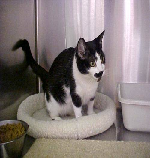

In [104]:
print(train_imgs[1].shape) 
array_to_img(train_imgs[300]) 

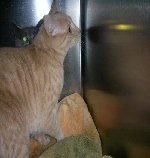

In [106]:
array_to_img(train_imgs[1200]) 

### Encode text category labels 

In [124]:
from sklearn.preprocessing import LabelEncoder 

all_labels = train_labels + validation_labels
le = LabelEncoder() 
le.fit(all_labels) 

train_labels_enc = le.transform(train_labels) 
validation_labels_enc = le.transform(validation_labels) 

# Label encoding : dog =1 cat= 0 
print(train_labels[1250:1263]) 
print(train_labels_enc[1250:1263])

['cat.11121.jpg', 'cat.11122.jpg', 'cat.11123.jpg', 'cat.11124.jpg', 'cat.11125.jpg', 'cat.11126.jpg', 'cat.11127.jpg', 'cat.11128.jpg', 'cat.11129.jpg', 'cat.1113.jpg', 'cat.11130.jpg', 'cat.11131.jpg', 'cat.11132.jpg']
[1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263]


### Pre-trained CNN model as a Feature Extractor 

In [127]:
from keras.applications import VGG16, resnet 
from keras.models import Model 
import keras 
input_shape = (150, 150, 3) 

In [131]:
# Loading pretrained vggi6 without top fulLy connected Layers 
vgg = VGG16(include_top=False, weights='imagenet', input_shape=input_shape)
# Adding custom layers on top of the pretrained VGG16 convolutional layers
output = vgg.layers[-1].output
# veg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape) 
# adding our own custom made Flatten Layer on top of pretrained vgg16 Conv Layers 
# output = vgg.layers[-1].output 
output = keras.layers.Flatten()(output) 
vgg_model = Model(vgg.input, output) 
# freeze all the Layers 
vgg_model.trainable = False 
for layer in vgg_model. layers: 
    layer.trainable = False 

In [134]:
# Check out the status of all vgg Layers so far 
import pandas as pd 
pd.set_option('max_colwidth', None) 
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_2, built=True>",input_layer_2,False
1,"<Conv2D name=block1_conv1, built=True>",block1_conv1,False
2,"<Conv2D name=block1_conv2, built=True>",block1_conv2,False
3,"<MaxPooling2D name=block1_pool, built=True>",block1_pool,False
4,"<Conv2D name=block2_conv1, built=True>",block2_conv1,False
5,"<Conv2D name=block2_conv2, built=True>",block2_conv2,False
6,"<MaxPooling2D name=block2_pool, built=True>",block2_pool,False
7,"<Conv2D name=block3_conv1, built=True>",block3_conv1,False
8,"<Conv2D name=block3_conv2, built=True>",block3_conv2,False
9,"<Conv2D name=block3_conv3, built=True>",block3_conv3,False


In [138]:
# Loading pretrained resnet without top fully connected Layers 
resnet = resnet.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape) 
# adding our own custom made Flatten Layer on top of pretrained resnet Conv Layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [139]:
output = resnet.layers[-1].output 
output = keras.layers.Flatten() (output) 
resnet_model = Model(resnet.input, output) 

# freeze all the Layers 
resnet_model.trainable = False 
for layer in resnet_model.layers: 
    layer.trainable = False

In [143]:
# Check out the status of all resnet Layers so far 

import pandas as pd 
pd.set_option('max_colwidth', None) 
layers = [(layer, layer.name, layer.trainable) for layer in resnet_model.layers] 
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable' ]) 

,Layer Type,Layer Name,Layer Trainable
0,"<InputLayer name=input_layer_3, built=True>",input_layer_3,False
1,"<ZeroPadding2D name=conv1_pad, built=True>",conv1_pad,False
2,"<Conv2D name=conv1_conv, built=True>",conv1_conv,False
3,"<BatchNormalization name=conv1_bn, built=True>",conv1_bn,False
4,"<Activation name=conv1_relu, built=True>",conv1_relu,False
...,...,...,...
171,"<Conv2D name=conv5_block3_3_conv, built=True>",conv5_block3_3_conv,False
172,"<BatchNormalization name=conv5_block3_3_bn, built=True>",conv5_block3_3_bn,False
173,"<Add name=conv5_block3_add, built=True>",conv5_block3_add,False
174,"<Activation name=conv5_block3_out, built=True>",conv5_block3_out,False


In [165]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer 
from keras.models import Sequential 
from tensorflow.keras import optimizers

In [178]:
# Stack our fully connected Layers on top of VGG16 model. VGG16's output will be th 
# custom-made Layers 

modelvgg = Sequential() 
modelvgg.add(vgg_model) 
modelvgg.add(Dense(512, activation='relu', input_dim=input_shape)) 
modelvgg.add(Dropout(0.3)) 
modelvgg.add(Dense(512, activation='relu')) 
modelvgg.add(Dropout(0.3)) 
modelvgg.add(Dense(1, activation='sigmoid')) 

modelvgg.compile(loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(learning_rate=1e-4), 
    metrics=['accuracy']) 

modelvgg.summary () 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ functional_29 (Functional)           │ (None, 8192)                │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [167]:
print(train_imgs_scaled.shape)

(1319, 150, 150, 3)


In [191]:
# Training the model 
historyvgg = modelvgg.fit(x=train_imgs_scaled, y=train_labels_enc, 
    validation_data=(validation_imgs_scaled, validation_labels_enc), 
    batch_size=80, 
    epochs=30, 
    verbose=1) 

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 4.6741e-04 - loss: -11218.7695 - val_accuracy: 0.0000e+00 - val_loss: 83.2107
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.0024 - loss: -74560.4609 - val_accuracy: 0.0000e+00 - val_loss: 224.1096
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 3.3483e-04 - loss: -177925.5469 - val_accuracy: 0.0000e+00 - val_loss: 424.1812
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 5.4457e-04 - loss: -311740.4062 - val_accuracy: 0.0000e+00 - val_loss: 689.9407
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - accuracy: 0.0014 - loss: -491682.0625 - val_accuracy: 0.0000e+00 - val_loss: 1020.3579
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 3.9796e-04 - loss: -733674.0625 - val_accuracy: 0.0000e+00 - val_loss: 1422.4774
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 2.2354e-04 - loss: -1017460.6250 - val_accuracy: 0.0000e+00 - val_loss: 1899.1820
Epoch 8/30
17

In [171]:
# SAVE MODEL ------------------------- 
modelvgg.save("C:\\Users\\MOHD TALHA HUSSAIN\\OneDrive - Anglia Ruskin University\\Applications of Machine Learning\\Week 4\\myVGGmodel.keras") 

In [179]:
# Load the vgg model 
from tensorflow import keras 
#modelvgg = keras.models.load_model('C:\\Users\\MOHD TALHA HUSSAIN\\OneDrive - Anglia Ruskin University\\Applications of Machine Learning\\Week 4\\myVGGmodel.keras')

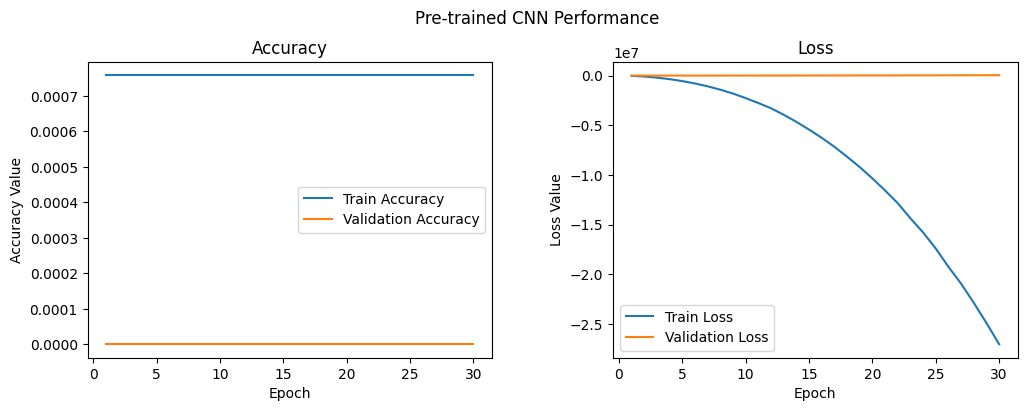

In [192]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
t = f.suptitle('Pre-trained CNN Performance', fontsize=12) 
f.subplots_adjust(top=0.85, wspace=0.3) 

epoch_list = list(range(1, 31)) 
ax1.plot(epoch_list, historyvgg.history[ 'accuracy' ], 
    label='Train Accuracy') 
ax1.plot(epoch_list, historyvgg.history['val_accuracy'], 
    label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5)) 
ax1.set_ylabel( 'Accuracy Value') 
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy') 
l1 = ax1.legend(loc="best") 

ax2.plot(epoch_list, historyvgg.history['loss'], 
    label='Train Loss') 
ax2.plot(epoch_list, historyvgg.history['val_loss'], 
    label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best") 

In [209]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --------- ------------------------------ 2.9/12.8 MB 16.8 MB/s eta 0:00:01
   ------------------- -------------------- 6.3/12.8 MB 16.8 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.8 MB 17.2 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 17.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [210]:
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage.transform import resize 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
It seems to be dog


C:\Users\MOHD TALHA HUSSAIN\AppData\Local\Temp\ipykernel_13868\2417844054.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("It seems to be", classes[int(np.round(pred))])


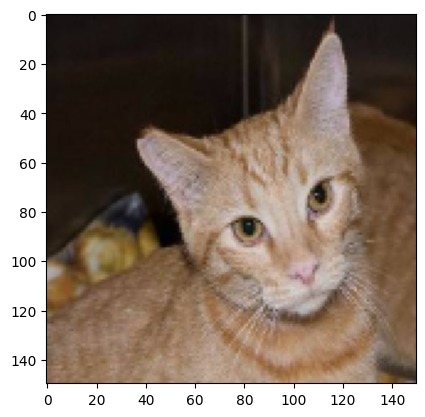

In [216]:
cat = img.imread('cat.jpg') 
resized_cat = resize(cat,(150,150,3)) 
plt.imshow(resized_cat, cmap='gray' ) 

classes =['cat', 'dog' ] 
pred = modelvgg.predict(np.expand_dims(resized_cat, axis=0)) 
print("It seems to be", classes[int(np.round(pred))]) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
It seems to be  dog


C:\Users\MOHD TALHA HUSSAIN\AppData\Local\Temp\ipykernel_13868\2460432027.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("It seems to be ", classes[int(np.round(pred) )])


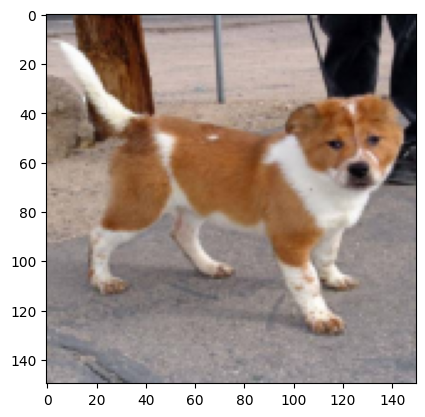

In [214]:
dog = img.imread('dog.jpg') 
resized_dog = resize(dog, (150,150,3)) 
plt.imshow(resized_dog, cmap='gray' ) 

classes =['cat', 'dog' ] 
pred = modelvgg.predict(np.expand_dims(resized_dog, 0)) 
print("It seems to be ", classes[int(np.round(pred) )]) 